In [11]:
import scipy.io.wavfile as wav
import numpy as np
import speechpy
import os
import librosa
import matplotlib.pyplot as plt

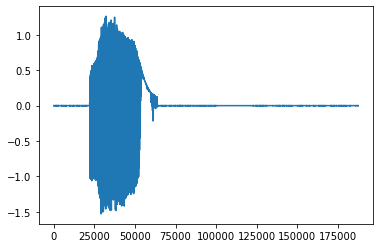

In [116]:
signal, fs = librosa.load("SpiroMask-July2021/SmartMaskData/FVC/N95/Hatim.FVC_N95.2be0uvo6.wav")
plt.plot(signal)

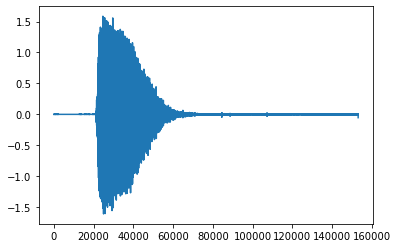

In [108]:
signal_preemphasized = speechpy.processing.preemphasis(signal, cof=0.98)
plt.plot(signal_preemphasized)

In [117]:
# Example of staching frames
frames = speechpy.processing.stack_frames(signal, sampling_frequency=fs, frame_length=0.020, frame_stride=0.01, filter=lambda x: np.ones((x,)),
         zero_padding=True)
print(frames.shape)

850 187387 441 220.0
(850, 441)


In [118]:
# Example of extracting power spectrum
power_spectrum = speechpy.processing.power_spectrum(frames, fft_points=512)
print('power spectrum shape=', power_spectrum.shape)

############# Extract MFCC features #############
mfcc = speechpy.feature.mfcc(signal, sampling_frequency=fs, frame_length=0.020, frame_stride=0.01,
             num_filters=40, fft_length=512, low_frequency=0, high_frequency=None)
mfcc_cmvn = speechpy.processing.cmvnw(mfcc,win_size=301,variance_normalization=True)
print('mfcc(mean + variance normalized) feature shape=', mfcc_cmvn.shape)



############# Extract logenergy features #############
logenergy = speechpy.feature.mfe(signal, sampling_frequency=fs, frame_length=0.020, frame_stride=0.01,
             num_filters=40, fft_length=512, low_frequency=0, high_frequency=None)
#logenergy_feature_cube = speechpy.feature.extract_derivative_feature(logenergy)
print('logenergy features=', logenergy.shape)

power spectrum shape= (850, 257)
mfcc(mean + variance normalized) feature shape= (849, 13)


AttributeError: 'tuple' object has no attribute 'shape'

In [120]:
logenergy[0].shape

(849, 40)

In [76]:
power_spectrum = np.mean(power_spectrum, axis=1)
power_spectrum

array([0.001766  , 0.0021519 , 0.00162485, ..., 0.00152202, 0.00105872,
       0.00108598])

In [77]:
import librosa
melspectogram = np.mean(librosa.feature.melspectrogram(y=signal_preemphasized, sr=16000, n_mels=64, fmax=8000), axis=1)
melspectogram.shape

(64,)

In [78]:
result = np.hstack((power_spectrum, melspectogram))

In [79]:
result.shape

(1076,)

In [69]:
power_spectrum

(1012,)

In [72]:
power_spectrum.shape

(1012, 257)